# Pre-Processing Techniques

## Imports

In [1]:
import pandas as pd

## Read the Relevant Dataframes and Merge

In [54]:
# Read the dfs
ptau = pd.read_csv('Data/Plasma/ADNI_BLENNOWPLASMANFL_10_03_18_27Nov2023.csv')
nfl = pd.read_csv('Data/Plasma/BLENNOWPLASMATAU_07Feb2024.csv')
ab = pd.read_csv('Data/Plasma/UPENNPLASMA_27Nov2023.csv')

# Confirm Shapes before merging
print("ptau shape is", ptau.shape)
print("nfl shape is", nfl.shape)
print("ab shape is", ab.shape)

df1 = pd.merge(ptau, nfl, on=['RID', 'VISCODE'], how='inner')[['RID', 'VISCODE', 'PLASMA_NFL', 'PLASMATAU']]
print("\nBLEN Data Makes the Shape", df1.shape)

# Merge UPENN in
df1 = pd.merge(df1, ab, on=['RID', 'VISCODE'], how='inner').drop("update_stamp", axis=1)
df1

# Create the AB42/AB40 value
df1['AB4240'] = df1['AB42'] / df1['AB40']
df1.drop(['AB42', 'AB40'], axis=1)

# NEXT STEPS:
# - Visualise the data on Graphs
# - Try with other sets


ptau shape is (598, 9)
nfl shape is (581, 8)
ab shape is (2453, 5)

BLEN Data Makes the Shape (580, 4)


,RID,VISCODE,PLASMA_NFL,PLASMATAU,AB4240
0,2,bl,28.2,2.41,0.331165
1,3,bl,188.3,3.84,0.220661
2,4,bl,31.2,3.76,0.311458
3,5,bl,36.3,3.81,0.189760
4,6,bl,52.5,2.86,0.153287
...,...,...,...,...,...
519,1402,bl,94.1,4.45,0.260446
520,1409,bl,46.4,3.54,0.231390
521,1414,bl,18.7,1.45,0.130205
522,1419,bl,25.8,1.56,0.194001


In [75]:
# Now Combine the DX given vales
dx = pd.read_csv('Data/ADNIMERGE_15Jun2023.csv')
df = pd.merge(df1, dx, on=['RID', 'VISCODE'], how='inner') #[['RID', 'VISCODE', 'DX', 'PLASMA_NFL', 'PLASMATAU', 'AB40', 'AB42']]

df = df[['RID', 'VISCODE', 'DX', 'PLASMA_NFL', 'PLASMATAU', 'AB4240', 'MMSE', 'PTEDUCAT', 'AGE']]

df

/var/folders/9h/tqk_65w50d95gtyf68q0hv880000gn/T/ipykernel_1302/2889144691.py:2: DtypeWarning: Columns (20,105) have mixed types. Specify dtype option on import or set low_memory=False.
  dx = pd.read_csv('Data/ADNIMERGE_15Jun2023.csv')


,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE
0,2,bl,CN,28.2,2.41,0.331165,28.0,16,74.3
1,3,bl,Dementia,188.3,3.84,0.220661,20.0,18,81.3
2,4,bl,MCI,31.2,3.76,0.311458,27.0,10,67.5
3,5,bl,CN,36.3,3.81,0.189760,29.0,16,73.7
4,6,bl,MCI,52.5,2.86,0.153287,25.0,13,80.4
...,...,...,...,...,...,...,...,...,...
519,1402,bl,Dementia,94.1,4.45,0.260446,23.0,20,69.3
520,1409,bl,Dementia,46.4,3.54,0.231390,21.0,15,65.9
521,1414,bl,MCI,18.7,1.45,0.130205,27.0,18,74.3
522,1419,bl,MCI,25.8,1.56,0.194001,28.0,17,77.9


## Rename Fields

In [87]:
# Rename to be more intuitive for rest of detection
df = df.replace("CN", "SCD").replace("Dementia", "AD").dropna()

df

,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE
0,2,bl,SCD,28.2,2.41,0.331165,28.0,16,74.3
1,3,bl,AD,188.3,3.84,0.220661,20.0,18,81.3
2,4,bl,MCI,31.2,3.76,0.311458,27.0,10,67.5
3,5,bl,SCD,36.3,3.81,0.189760,29.0,16,73.7
4,6,bl,MCI,52.5,2.86,0.153287,25.0,13,80.4
...,...,...,...,...,...,...,...,...,...
519,1402,bl,AD,94.1,4.45,0.260446,23.0,20,69.3
520,1409,bl,AD,46.4,3.54,0.231390,21.0,15,65.9
521,1414,bl,MCI,18.7,1.45,0.130205,27.0,18,74.3
522,1419,bl,MCI,25.8,1.56,0.194001,28.0,17,77.9


## Plot the data

In [77]:
import matplotlib.pyplot as plt

In [88]:
# Get all the different classes
SCD = df.loc[df["DX"] == "SCD"]
MCI = df.loc[df["DX"] == "MCI"]
AD = df.loc[df["DX"] == "AD"]

SCD
df.to_csv("Data/ProcessedData/PreProcessingFile.csv")

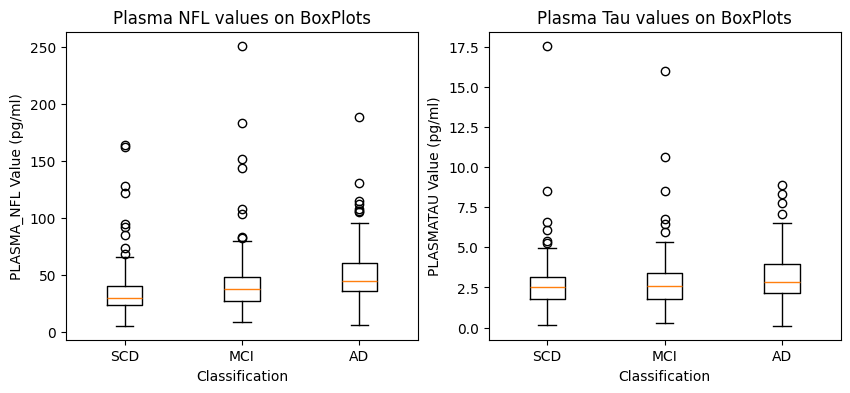

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

box_plot_nfl = [list(SCD['PLASMA_NFL'].dropna()), list(MCI['PLASMA_NFL']), list(AD['PLASMA_NFL'].dropna())]

axes[0].boxplot(box_plot_nfl, showfliers=True, labels=['SCD', 'MCI', 'AD'])
axes[0].set_title('Plasma NFL values on BoxPlots')
axes[0].set_ylabel('PLASMA_NFL Value (pg/ml)')
axes[0].set_xlabel('Classification')

# Remove the null values also
box_plot_tau = [list(SCD['PLASMATAU'].dropna()), list(MCI['PLASMATAU']), list(AD['PLASMATAU'].dropna())]

axes[1].boxplot(box_plot_tau, showfliers=True, labels=['SCD', 'MCI', 'AD'])
axes[1].set_title('Plasma Tau values on BoxPlots')
axes[1].set_ylabel('PLASMATAU Value (pg/ml)')
axes[1].set_xlabel('Classification')
plt.show()

Text(0.5, 0, 'Classification')

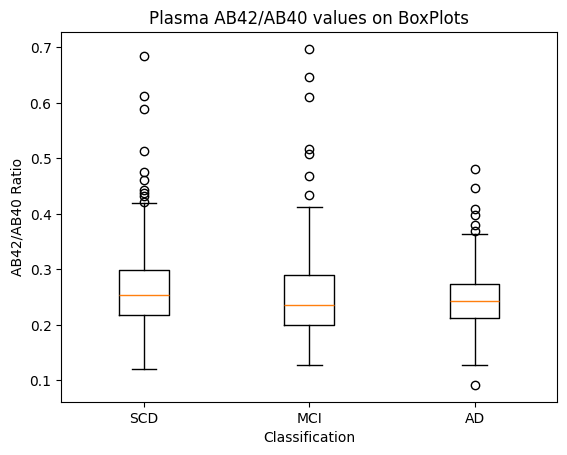

In [80]:
# Now we look at the AB42/40

box_plot_ab = [list(SCD['AB4240'].dropna()), list(MCI['AB4240'].dropna()), list(AD['AB4240'].dropna())]

plt.boxplot(box_plot_ab, showfliers=True, labels=['SCD', 'MCI', 'AD'])
plt.title('Plasma AB42/AB40 values on BoxPlots')
plt.ylabel('AB42/AB40 Ratio')
plt.xlabel('Classification')

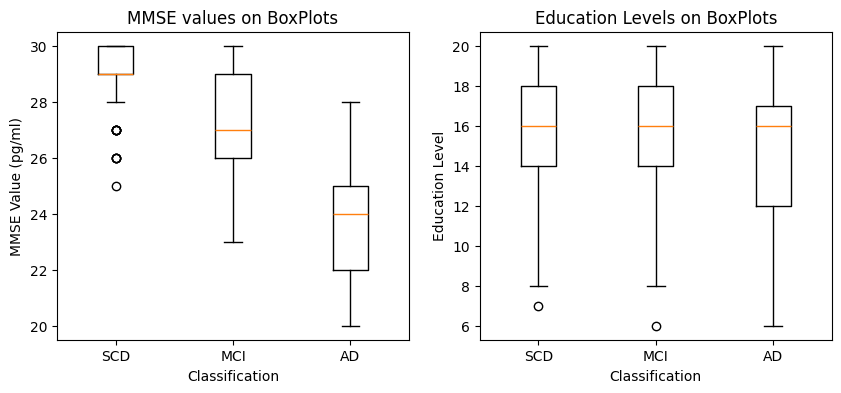

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

box_plot_mmse = [list(SCD['MMSE'].dropna()), list(MCI['MMSE'].dropna()), list(AD['MMSE'].dropna())]

axes[0].boxplot(box_plot_mmse, showfliers=True, labels=['SCD', 'MCI', 'AD'])
axes[0].set_title('MMSE values on BoxPlots')
axes[0].set_ylabel('MMSE Value (pg/ml)')
axes[0].set_xlabel('Classification')

# Remove the null values also
box_plot_ed = [list(SCD['PTEDUCAT'].dropna()), list(MCI['PTEDUCAT']), list(AD['PTEDUCAT'].dropna())]

axes[1].boxplot(box_plot_ed, showfliers=True, labels=['SCD', 'MCI', 'AD'])
axes[1].set_title('Education Levels on BoxPlots')
axes[1].set_ylabel('Education Level')
axes[1].set_xlabel('Classification')
plt.show()

Text(0.5, 0, 'Classification')

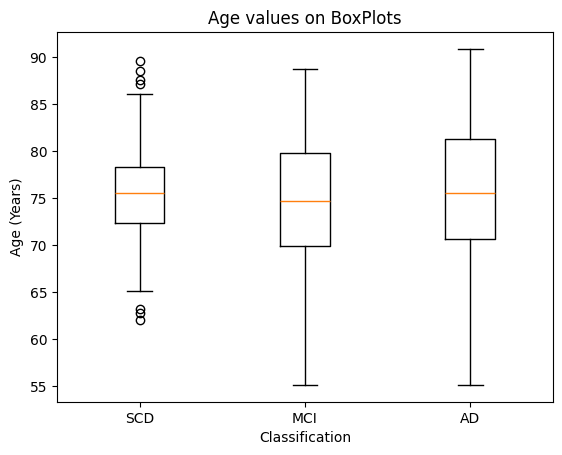

In [85]:
# Now we look at the Age

box_plot_age = [list(SCD['AGE'].dropna()), list(MCI['AGE'].dropna()), list(AD['AGE'].dropna())]

# Plot the data
plt.boxplot(box_plot_age, showfliers=True, labels=['SCD', 'MCI', 'AD'])
plt.title('Age values on BoxPlots')
plt.ylabel('Age (Years)')
plt.xlabel('Classification')

## Identify Outliers

In [ ]:
# SOURCE :: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#:~:text=Use%20Inter%2DQuartile%20Range%20(IQR,percentile%20of%20the%20dataset%2C%20respectively.

